## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn

### Load the dataset

In [7]:
df_tips=pd.read_csv('tips.csv')

In [8]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1. Make a list of categorical and numerical columns in the data.

In [9]:
df_tips.select_dtypes(['float64','int64']).columns

Index(['total_bill', 'tip', 'size'], dtype='object')

In [10]:
df_tips.select_dtypes(['object']).columns

Index(['sex', 'smoker', 'day', 'time'], dtype='object')

In [11]:
df_tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

### 2. Compute the average bill amount for each day.

In [12]:
df_tips.groupby('day')['total_bill'].mean()


day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

### 3. Which gender is more generous in giving tips?

In [13]:
genrsGender=df_tips.groupby('sex')['tip'].sum()
genrsGender

sex
Female    246.51
Male      485.07
Name: tip, dtype: float64

In [14]:
genrsGender.max()

485.07

### 4. According to the data, were there more customers for dinner or lunch?

In [15]:
df_tips.groupby('time')['size'].sum()

time
Dinner    463
Lunch     164
Name: size, dtype: int64

In [16]:
df_tips.groupby('time')['size'].sum().max()

463

Its found that Dinner is more popular to Lunch, and number of customer are therefore more incline to Dinner.

### 5. Based on the statistical summary, comment on the variable 'tip'

In [17]:
df_tips['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

There is a total_count of tip at 244 with the most frequent tip of 10

### 6. Find the busiest day in terms of the orders?

In [18]:
df_tips.groupby('day')['size'].sum().sort_values(ascending=False)

day
Sat     219
Sun     216
Thur    152
Fri      40
Name: size, dtype: int64

Most busiest day is found to be Saturday followed by Sunday

### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

In [19]:
df_tips['total_bill'].skew()
# positive skewness observerd

1.1332130376158205

<AxesSubplot: xlabel='total_bill', ylabel='Density'>

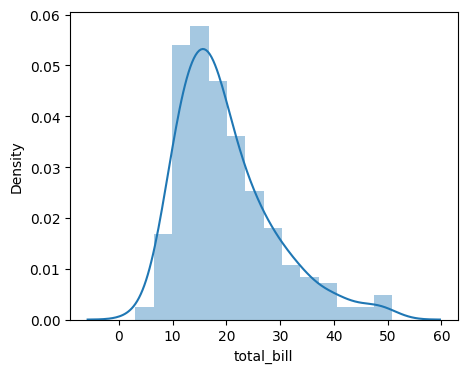

In [20]:
# df_tips['total_bill'].plot(kind='kde')
plt.figure(figsize=(5,4))
sns.distplot(df_tips['total_bill'])

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

In [21]:
df_tips[['tip','total_bill']].corr()
# df_tips[['total_bill','tip']].plot(kind='kde')

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


<AxesSubplot: xlabel='total_bill', ylabel='tip'>

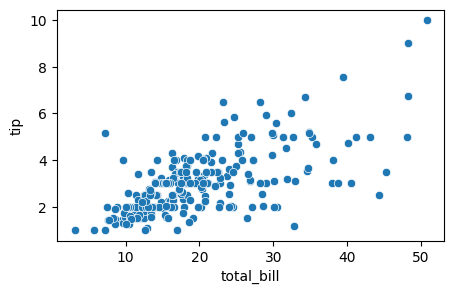

In [22]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='total_bill',y='tip',data=df_tips)

Tip is more concentrated on 10 to 20 total_bill with tip ranging from 1 to 4.Furthermore, tip raised as total bill increases. Therefore they have direct corelation.

### 9. What is the percentage of males and females in the dataset? and display it in the plot

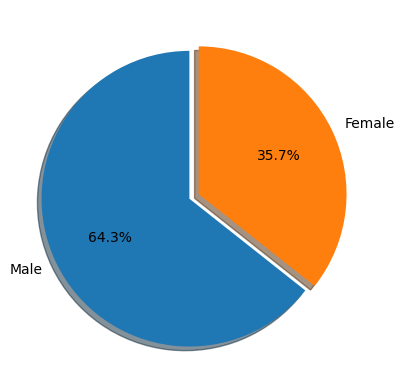

In [23]:
y=df_tips['sex'].value_counts(normalize=True)
myexplode=[0.07,0]
mylabels = ["Male", "Female"]
plt.pie(y,labels=mylabels,autopct='%1.1f%%',startangle=90,explode=myexplode,shadow=True)
plt.show()

Male have greater count than Female

### 10. Compute the gender-wise count based on smoking habits and display it in the plot

<AxesSubplot: xlabel='sex'>

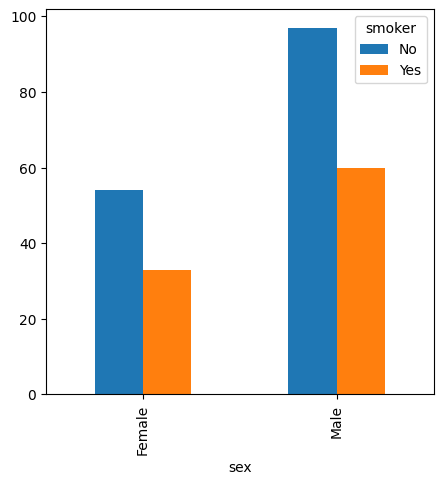

In [24]:
pd.crosstab(df_tips['sex'],df_tips['smoker']).plot(kind='bar',figsize=(5,5))

Male smokers are more when compared to Female smokers. As the males are more generally it show that males are skewed here.

### 11. Compute the average tip amount given for different days and display it in the plot.

In [25]:
# pd.crosstab(df_tips['tip'],df_tips['day']).mean().plot(kind='bar')
df_tips.groupby('day')['tip'].mean()

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

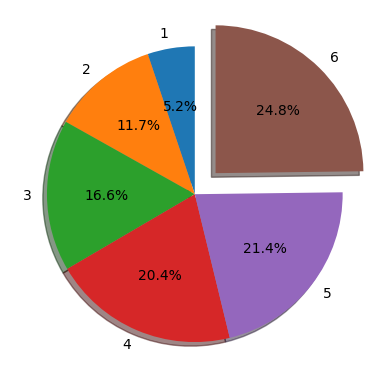

In [26]:
y=df_tips.groupby('size')['total_bill'].mean()
mylabels=[1,2,3,4,5,6]
myexplode=[0,0,0,0,0,0.2]
plt.pie(y,labels=mylabels,autopct='%1.1f%%',explode=myexplode,startangle=90,shadow=True)
plt.show()
# sns.barplot(x='size',y='total_bill',data=df_tips,estimator=np.mean,ci=False)
# estimator=np.mean, here the mean will be taken of the y axis

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

<AxesSubplot: xlabel='total_bill', ylabel='sex'>

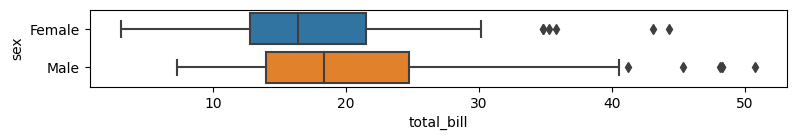

In [27]:
# y=df_tips.groupby('sex')['total_bill'].sum()
plt.figure(figsize=(9,1))
sns.boxplot(x='total_bill',y='sex',data=df_tips,orient='h')

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [28]:
m=df_tips.groupby(['time','day'])['total_bill'].max().sort_values(ascending=False)
m[[0,1,]]

time    day
Dinner  Sat    50.81
        Sun    48.17
Name: total_bill, dtype: float64

### 15. Compute the percentage of missing values in the dataset.

In [29]:
(df_tips.isnull().sum()/len(df_tips))*100

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

Since the missing values is null, the percentage is zero.

### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [30]:
df_tips[df_tips.duplicated()]

,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,Female,Yes,Thur,Lunch,2


In [31]:
df_tips.duplicated().sum()
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [32]:
d=df_tips.copy()
d.drop_duplicates()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


There is one duplicated value present and has been removed.

### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

<AxesSubplot: >

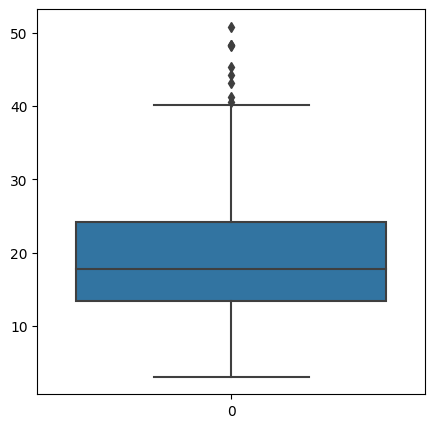

In [33]:
plt.figure(figsize=(5,5))
sns.boxplot(df_tips['total_bill'])

<AxesSubplot: >

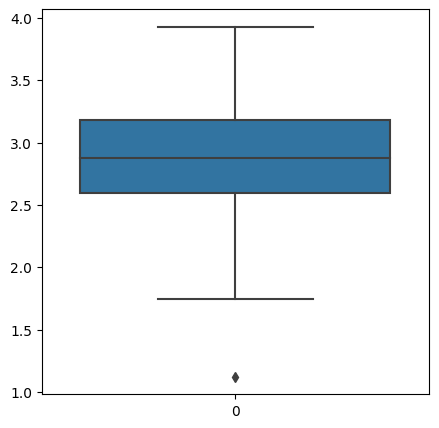

In [34]:
plt.figure(figsize=(5,5))
sns.boxplot(np.log(df_tips['total_bill']))

The above boxplot shows that there is on outlier presend even after log transformation.

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

<AxesSubplot: >

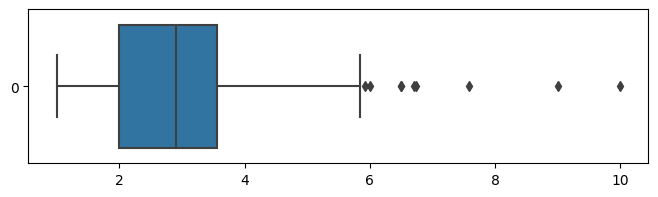

In [35]:
plt.figure(figsize=(8,2))
sns.boxplot(df_tips['tip'],orient='h')



<AxesSubplot: >

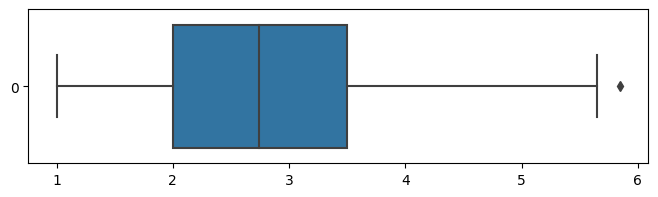

In [36]:
Q1=df_tips['tip'].quantile(0.25)
Q3=df_tips['tip'].quantile(0.75)
IQR=Q3-Q1
upper_whisker=Q3+(1.5*IQR)
lower_whisker=Q1-(1.5*IQR)
remove_Outlier=df_tips.loc[(df_tips['tip']<upper_whisker)&(df_tips['tip']>lower_whisker)]
# remove_Outlier['tip'].plot(kind='box',figsize=(5,5))
plt.figure(figsize=(8,2))
sns.boxplot(remove_Outlier['tip'],orient='h')

There seem to one outlier existing in the above image toward the

### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [37]:
df_tips.dtypes
sample=df_tips[['sex','smoker','day','time']]
pd.get_dummies(sample,drop_first=True).head()

,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,0,0,0,1,0,0
1,1,0,0,1,0,0
2,1,0,0,1,0,0
3,1,0,0,1,0,0
4,0,0,0,1,0,0


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [38]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_scale=df_tips.copy()
df_scale['total_bill']=min_max.fit_transform(df_scale[['total_bill']])

df_scale['total_bill'].max()

0.9999999999999999

In [39]:
df_scale['total_bill'].min()

0.0

In [40]:
df_scale.head()

,total_bill,tip,sex,smoker,day,time,size
0,0.291579,1.01,Female,No,Sun,Dinner,2
1,0.152283,1.66,Male,No,Sun,Dinner,3
2,0.375786,3.50,Male,No,Sun,Dinner,3
3,0.431713,3.31,Male,No,Sun,Dinner,2
4,0.450775,3.61,Female,No,Sun,Dinner,4


### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [41]:
tips_df=pd.DataFrame(data=df_scale,columns=['sex','smoker','day','time','tip','total_bill'],)
tips_df=pd.get_dummies(tips_df,drop_first=True)
tips_df

,tip,total_bill,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,1.01,0.291579,0,0,0,1,0,0
1,1.66,0.152283,1,0,0,1,0,0
2,3.50,0.375786,1,0,0,1,0,0
3,3.31,0.431713,1,0,0,1,0,0
4,3.61,0.450775,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
239,5.92,0.543779,1,0,1,0,0,0
240,2.00,0.505027,0,1,1,0,0,0
241,2.00,0.410557,1,1,1,0,0,0
242,1.75,0.308965,1,0,1,0,0,0


In [42]:
x=tips_df.drop('tip',axis=1)
x

,total_bill,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,0.291579,0,0,0,1,0,0
1,0.152283,1,0,0,1,0,0
2,0.375786,1,0,0,1,0,0
3,0.431713,1,0,0,1,0,0
4,0.450775,0,0,0,1,0,0
...,...,...,...,...,...,...,...
239,0.543779,1,0,1,0,0,0
240,0.505027,0,1,1,0,0,0
241,0.410557,1,1,1,0,0,0
242,0.308965,1,0,1,0,0,0


In [43]:
y=df_scale['tip']
y

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_text,Y_train,Y_text = train_test_split(x,y,test_size=0.3,train_size=0.7)
print(X_train.shape,X_text.shape)
print(Y_train.shape,Y_text.shape)

(170, 7) (74, 7)
(170,) (74,)


In [45]:
scale=min_max.fit_transform(df_tips[['total_bill','size']])
scale[[1,2,3]]

array([[0.1522832 , 0.4       ],
       [0.3757855 , 0.4       ],
       [0.43171345, 0.2       ]])

### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [46]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,Y_train)
LinearRegression()

LinearRegression()

In [47]:
for i, col_name in enumerate(X_train.columns):
    print("The coefficient {} is {}".format(col_name,lm.coef_[i]))

The coefficient total_bill is 4.694927064054363
The coefficient sex_Male is -0.14900904396980913
The coefficient smoker_Yes is -0.08301808556126836
The coefficient day_Sat is 0.1687710158166428
The coefficient day_Sun is 0.19178222553117913
The coefficient day_Thur is -0.11573185854638315
The coefficient time_Lunch is 0.24177220875508904


In [48]:
from sklearn.metrics import r2_score
predict = lm.predict(X_text)
print('r_squared value of the prediction on the test data:',r2_score(Y_text,predict).round(3))

r_squared value of the prediction on the test data: 0.49


### Happy Learning:)